In [14]:
import scipy.io as sio
import numpy as np
from os.path import join
import h5py

In [5]:
BASEDIR = '/home/ubuntu/datasets/vsp/'
mat = sio.loadmat(join(BASEDIR, 'images/car/n02958343_764.mat'))

In [6]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Nov  5 18:36:18 2016',
 '__version__': '1.0',
 '__globals__': [],
 'anno': array([[array([[1]], dtype=int32),
         array([[array([[ 1.24576503e+02,  1.26456284e+02,  2.24576503e+02,
          2.26456284e+02,  7.79010722e+02,  7.00652993e+02,
          1.29195715e+03,  1.21359942e+03,  1.00000000e+00],
        [-4.18934426e+01,  8.97349727e+01,  5.81065574e+01,
          1.89734973e+02, -7.48909177e+01,  5.12292338e+02,
          4.38055511e+02,  1.02523877e+03,  1.00000000e+00]])],
        [array([[ -27.81693989,   45.66939891,   72.18306011,  145.66939891,
           -2.68599971,  286.25955064,  510.26042886,  799.20597922,
            2.        ],
        [ 123.35245902,   92.79508197,  223.35245902,  192.79508197,
          772.73203308,  527.98905884, 1285.67846165, 1040.93548741,
            2.        ]])],
        [array([[ 116.00819672,  174.5       ,  216.00819672,  274.5       ,
          735.05990193

In [7]:
anno = mat['anno']

In [12]:
anno[0, 1][0]

array([array([[ 1.24576503e+02,  1.26456284e+02,  2.24576503e+02,
         2.26456284e+02,  7.79010722e+02,  7.00652993e+02,
         1.29195715e+03,  1.21359942e+03,  1.00000000e+00],
       [-4.18934426e+01,  8.97349727e+01,  5.81065574e+01,
         1.89734973e+02, -7.48909177e+01,  5.12292338e+02,
         4.38055511e+02,  1.02523877e+03,  1.00000000e+00]])],
      dtype=object)

In [15]:
occ = h5py.File('/home/ubuntu/datasets/occ/aeroplaneONE/n04012084_5465_1.mat', 'r')

In [28]:
list(occ['record/'].items())

[('SP', <HDF5 group "/record/SP" (2 members)>),
 ('annotation', <HDF5 group "/record/annotation" (5 members)>),
 ('img', <HDF5 dataset "img": shape (3, 500, 500), type "|u1">),
 ('loc', <HDF5 dataset "loc": shape (1, 1), type "<i4">),
 ('name', <HDF5 dataset "name": shape (97, 1), type "<u2">),
 ('occ_mask', <HDF5 dataset "occ_mask": shape (500, 500), type "<f8">),
 ('occludee', <HDF5 group "/record/occludee" (2 members)>),
 ('occluder', <HDF5 group "/record/occluder" (5 members)>),
 ('source', <HDF5 dataset "source": shape (48, 1), type "<u2">),
 ('vis', <HDF5 group "/record/vis" (1 members)>),
 ('vis_update', <HDF5 group "/record/vis_update" (2 members)>)]

In [30]:
list(occ['record/annotation'].items())

[('database', <HDF5 dataset "database": shape (8, 1), type "<u2">),
 ('filename', <HDF5 dataset "filename": shape (19, 1), type "<u2">),
 ('imgsize', <HDF5 dataset "imgsize": shape (3, 1), type "<f8">),
 ('objects', <HDF5 group "/record/annotation/objects" (9 members)>),
 ('size', <HDF5 group "/record/annotation/size" (3 members)>)]

In [35]:
list(occ['record/SP'].items())

[('anno', <HDF5 dataset "anno": shape (2, 1), type "|O">),
 ('filename', <HDF5 dataset "filename": shape (19, 1), type "<u2">)]

In [40]:
import matplotlib.pyplot as plt

img = occ['record/img'].value

/home/ubuntu/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
from PIL import Image

im = Image.fromarray(np.transpose(img, (2, 1, 0)))

im.save("aeroplane_covered.png")

In [84]:
''.join(chr(i[0]) for i in occ[occ['record/occluder/class'].value[1, 0]].value)

/home/ubuntu/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


'pottedplant'

In [46]:
occ9 = h5py.File('/home/ubuntu/datasets/occ/aeroplaneNINE/n02690373_610_1.mat', 'r')

/home/ubuntu/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


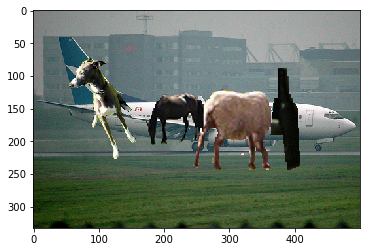

In [101]:
img9 = occ9['record/img'].value
im9 = Image.fromarray(np.transpose(img9, (2, 1, 0)))

im9.save("aeroplane_covered_2.png")
plt.imshow(np.transpose(img9, (2, 1, 0)))

In [49]:
list(occ9['record/occluder'].items())

[('bbox', <HDF5 dataset "bbox": shape (4, 1), type "|O">),
 ('center', <HDF5 dataset "center": shape (4, 1), type "|O">),
 ('class', <HDF5 dataset "class": shape (4, 1), type "|O">),
 ('mask', <HDF5 dataset "mask": shape (4, 1), type "|O">),
 ('name_jpg', <HDF5 dataset "name_jpg": shape (4, 1), type "|O">)]

In [85]:
''.join(chr(i[0]) for i in occ9[occ9['record/occluder/class'].value[1, 0]].value)

/home/ubuntu/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


'dog'

In [88]:
''.join(chr(i[0]) for i in occ9[occ9['record/occluder/class'].value[1, 0]].value)

/home/ubuntu/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


'sheep'

In [89]:
''.join(chr(i[0]) for i in occ9[occ9['record/occluder/class'].value[2, 0]].value)

/home/ubuntu/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


'bottle'

In [90]:
''.join(chr(i[0]) for i in occ9[occ9['record/occluder/class'].value[3, 0]].value)

/home/ubuntu/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


'horse'

In [102]:
output = np.load('/home/ubuntu/sample_out/CORnet-S_decoder_output_feats.npy')

In [103]:
np.argmax(output[0])

895

In [104]:
np.argmax(output[1])

355

In [105]:
np.argmax(output[2])

404

In [107]:
output[1].argsort()[-5:][::-1]

array([355, 354, 404, 345, 895])